<a href="https://colab.research.google.com/github/GoAshim/Convolutional-Neural-Network-with-TensorFlow/blob/main/02_Multiclass_Classification_in_CNN_with_Tensorflow_Predict_Image_in_CIFAR10_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiclass Classification in Convolutional Neural Network (CNN) using TensorFlow & Keras
In this project we will build CNN Deep Learning model and train it with pictures of different types of objects in the tensorflow CIFAR10 dataset so that the model will be able to predict the correct type from a new image.

## Step 1 - Import necessary libraries

In [30]:
# For data processing
import numpy as np
import random as rnd
import matplotlib.pyplot as plt

# For Convolutional Neural Network (CNN)
import tensorflow as tf
from tensorflow import keras
from keras import datasets
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Rescaling, BatchNormalization

## Step 2 - Import Data
We will get the images for this exercise from the CIFAR10 dataset which is publicly available in keras datasets library. This dataset contains pictures of multiple objects and is already split between training and test datasets to be used in the deep learning model.

In [17]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

## Step 3 - Exploratory Data Analysis
In this step we will analyze the data and it's features to get a better understanding before we can use in the subsequent CNN model.

In [18]:
# Check the shape of training and test data
print("Shape of the training data: ", X_train.shape)
print("Shape of the test data: ", X_test.shape)
print("Shape of the training labels: ", y_train.shape)
print("Shape of the test labels: ", y_test.shape)

Shape of the training data:  (50000, 32, 32, 3)
Shape of the test data:  (10000, 32, 32, 3)
Shape of the training labels:  (50000, 1)
Shape of the test labels:  (10000, 1)


array([[[125, 125, 116],
        [110, 101,  91],
        [102,  90,  83],
        ...,
        [202, 207, 214],
        [200, 205, 212],
        [202, 208, 214]],

       [[142, 146, 142],
        [146, 144, 139],
        [176, 172, 170],
        ...,
        [195, 201, 205],
        [198, 205, 209],
        [204, 211, 215]],

       [[180, 185, 183],
        [143, 146, 146],
        [156, 157, 157],
        ...,
        [122, 111, 113],
        [139, 128, 131],
        [158, 147, 150]],

       ...,

       [[104,  82,  41],
        [101,  80,  39],
        [101,  81,  38],
        ...,
        [126, 103,  67],
        [126, 103,  69],
        [125, 101,  68]],

       [[104,  81,  40],
        [105,  84,  41],
        [109,  88,  43],
        ...,
        [138, 113,  78],
        [137, 113,  80],
        [137, 112,  81]],

       [[105,  83,  42],
        [108,  87,  45],
        [115,  94,  50],
        ...,
        [143, 117,  82],
        [143, 116,  84],
        [144, 116,  86]]], dtype=uint8)
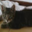

In [22]:
# Print a random item from the training data
X_train[9]

In [21]:
# Print a random item from the training label
y_train[9]

array([3], dtype=uint8)

In [23]:
# Get the maximum and minimum value of the training and test labels
print("Maximum value of the training label: ", y_train.max())
print("Minimum value of the training label: ", y_train.min())
print("Maximum value of the test label: ", y_test.max())
print("Minimum value of the test label: ", y_test.min())

Maximum value of the training label:  9
Minimum value of the training label:  0
Maximum value of the test label:  9
Minimum value of the test label:  0


In [31]:
# Create an array representing all 10 labels of the images in the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

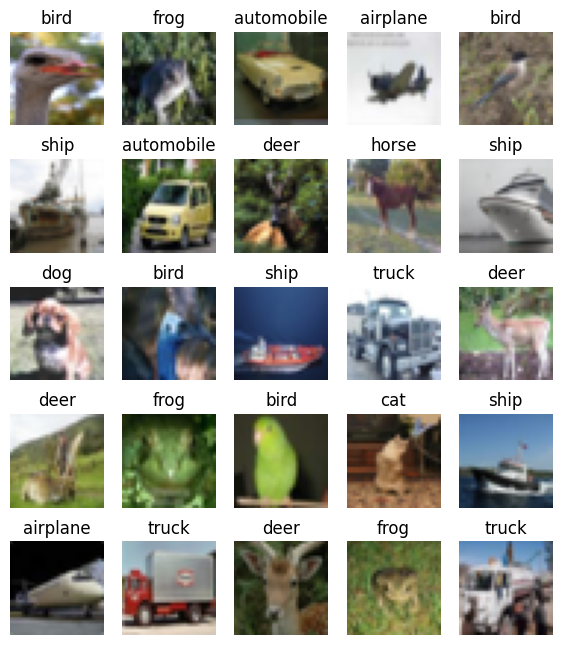

In [44]:
# Plot 25 random images from the training data
plt.figure(figsize=(7, 8))

for i in range(25):
  # Generate a random number between 0 and the length of the training data, which is 50000
  ind = rnd.choice(range(len(X_train)))
  plt.subplot(5, 5, i+1)
  plt.imshow(X_train[ind])
  plt.title(labels[y_train[ind, 0]])
  plt.axis('off')

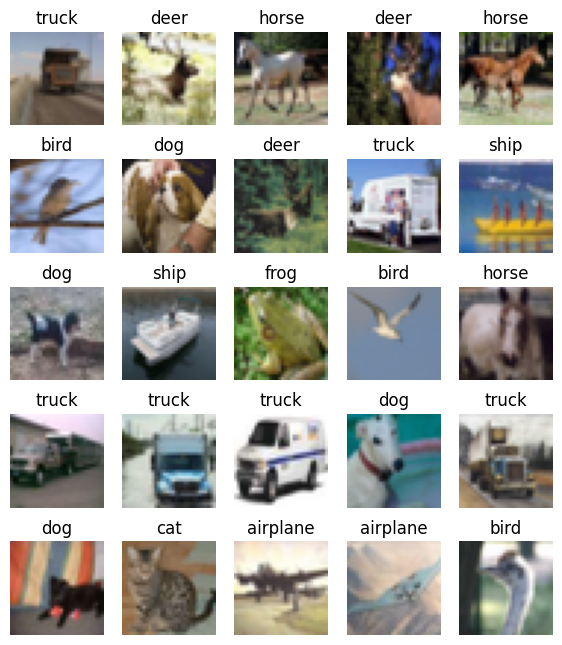

In [45]:
# Plot 25 random images from the test data
plt.figure(figsize=(7, 8))

for i in range(25):
  ind = rnd.choice(range(len(X_test)))
  plt.subplot(5, 5, i+1)
  plt.imshow(X_test[ind])
  plt.title(labels[y_test[ind, 0]])
  plt.axis('off')

## Step 5 - Build the CNN Model
In this step we will build and compile CNN model.

In [ ]:
# Build the CNN model

In [ ]:
# Compile the model


## Step 6 - Run the CNN Model
In this step we will fit the CNN model on the training data and use the model to see how it performs on the test data.

In [24]:
# Run the model on the training and test data

In [25]:
# Check the model summary


In [26]:
# Plot the accuracy of model on training and test data

In [27]:
# Plot the loss of model on training and test data

### Observation
From the first chart above, we see that the training accuracy is continuously increasing by every epoch and at the end of the 10th epoch, it's almost reached 100%, however the test accuracy reached about 75% at the end of the third epoch and stayed flat thereafter.

Similarly, from the second chart above, we see that the training loss is continuously decreasing by every epoch and at the end of the 10th epoch, it's reached close to 0%, however the test loss on the other hand kept on increasing.

The large gap in both accuracy and loss between the training and test data is due to **overfitting** of our model on the training data, which we will need to correct.

## Step 7 - Rebuild the CNN Model
In this step we will rebuild the CNN model we built earlier above with certain changes to address the overfitting problem.

In [ ]:
# Compile the model

## Step 8 - Rerun the CNN Model
In this step we will fit the updated CNN model on the training data and use the model to see how it performs on the test data.

In [28]:
# Plot the accuracy of model on training and test data

In [29]:
# Plot the loss of model on training and test data

### Observation
From the two charts above we can see that the gap of loss as well as accuracy between the training and test runs have decreased in the second model with respect to that of the first model. That confirms that the introduction of the Batch Normalization and Dropout layers have helped to address the overfitting problem to some extent.

## Step 9 - Test the CNN Model
In this step we will test the updated CNN model with a new picture of dog and cat.

### Observation
From the code above we see that our model returned 0.98 on the dog picture, which is very close to 1 representing dog, and 0.2 on the cat picture, which is relatively close to 0 representing cat.